### Problem Statement:
Nowadays, shopping malls and Big Marts keep track of individual item sales data in
order to forecast future client demand and adjust inventory management. In a data
warehouse, these data stores hold a significant amount of consumer information and
particular item details. By mining the data store from the data warehouse, more
anomalies and common patterns can be discovered.

### Columns Description

1. Item_Identifier: Unique product ID
2. Item_Weight: Weight of product
3. Item_Fat_Content: Whether the product is low fat or not
4. Item_Visibility: The % of total display area of all products in a store allocated to theparticular product
5. Item_Type: The category to which the product belongs
6. Item_MRP: Maximum Retail Price (list price) of the product
7. Outlet_Identifier: Unique store ID
8. Outlet_Establishment_Year: The year in which store was established
9. Outlet_Size: The size of the store in terms of ground area covered
10. Outlet_Location_Type: The type of city in which the store is located
11. Outlet_Type: Whether the outlet is just a grocery store or some sort of supermarket
12. Item_Outlet_Sales: Sales of the product in the particulat store. This is the outcome variable to be predicted.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
## To see all columns of the dataset

pd.set_option("display.max_columns", None)

In [3]:
df = pd.read_csv('original_data_set/Train.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
# !pip install --user pandas-profiling

In [5]:
# from pandas_profiling import ProfileReport
# profile = ProfileReport(df, title="Pandas Profiling Report", explorative=True)

# profile.to_notebook_iframe()

# EDA

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [8]:
## Ceaking for missing values

df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
## Cheak for duplicate data

df.duplicated().sum()

0

## Remark

1. Missing values in Item_Weight,Outlet_Size
2. No duplicates row

In [10]:
## Creating two list of attriutes

Categorical = [i for i in df.columns if df[i].dtypes == 'object']
Numerical = [i for i in df.columns if df[i].dtypes != 'object' and i not in Categorical]

## Summary of Categorial data

In [11]:
#Summary of Categorial data

Categorical_summary = pd.DataFrame(columns=['columns', 'values', 'inc_na', 'exc_na', 'mode', 'missval', '%_missval'])
temp = pd.DataFrame()

for i in Categorical:
    temp['columns'] = [i]
    temp['values'] = [df[i].unique()]
    temp['inc_na'] = len(df[i].unique())
    temp['exc_na'] = df[i].nunique()
    temp['mode'] = df[i].mode()[0]
    temp['missval'] = df[i].isnull().sum()
    temp['%_missval'] = (df[i].isnull().sum()/len(df))*100
    Categorical_summary = pd.concat([temp,Categorical_summary],ignore_index=True)
    
Categorical_summary

,columns,values,inc_na,exc_na,mode,missval,%_missval
0,Outlet_Type,"[Supermarket Type1, Supermarket Type2, Grocery...",4,4,Supermarket Type1,0,0.000000
1,Outlet_Location_Type,"[Tier 1, Tier 3, Tier 2]",3,3,Tier 3,0,0.000000
2,Outlet_Size,"[Medium, nan, High, Small]",4,3,Medium,2410,28.276428
3,Outlet_Identifier,"[OUT049, OUT018, OUT010, OUT013, OUT027, OUT04...",10,10,OUT027,0,0.000000
4,Item_Type,"[Dairy, Soft Drinks, Meat, Fruits and Vegetabl...",16,16,Fruits and Vegetables,0,0.000000
5,Item_Fat_Content,"[Low Fat, Regular, low fat, LF, reg]",5,5,Low Fat,0,0.000000
6,Item_Identifier,"[FDA15, DRC01, FDN15, FDX07, NCD19, FDP36, FDO...",1559,1559,FDG33,0,0.000000


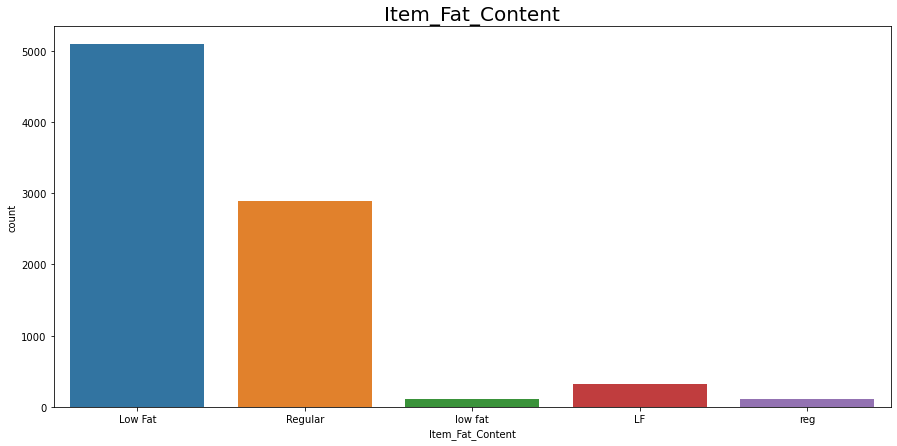

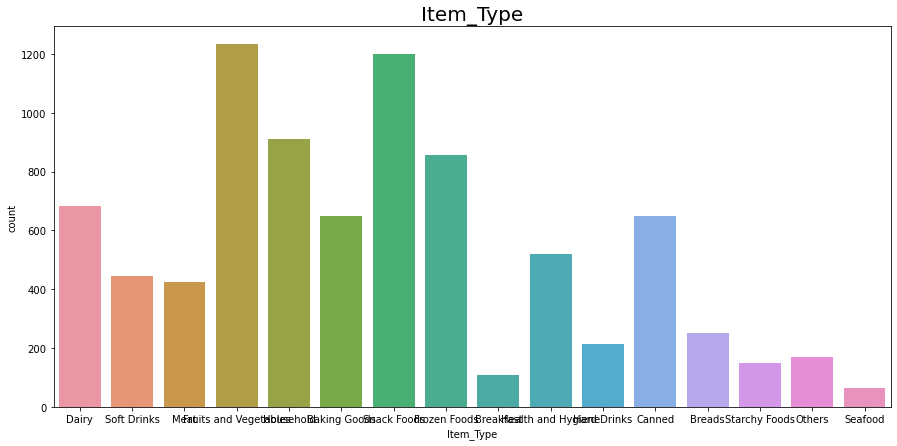

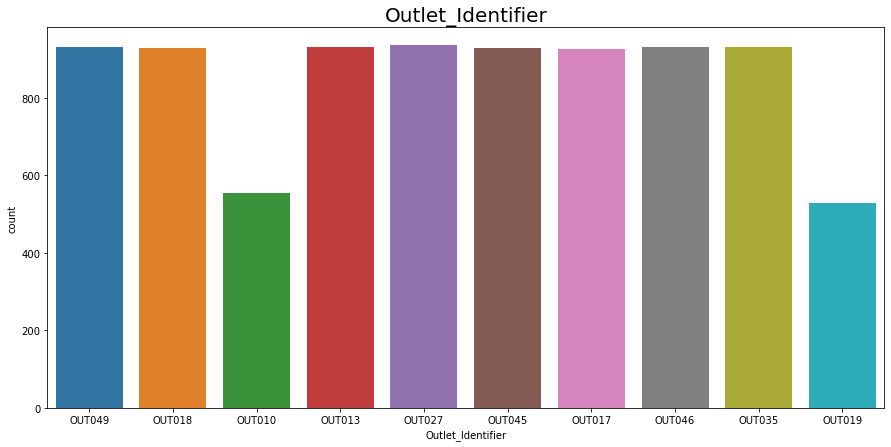

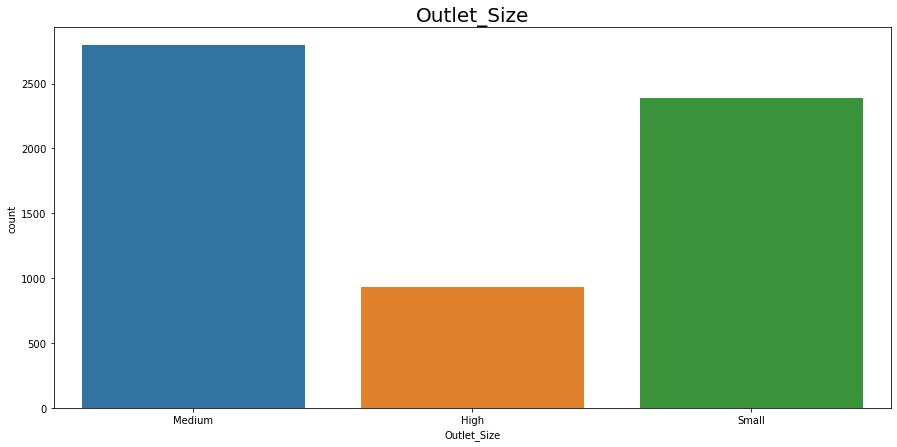

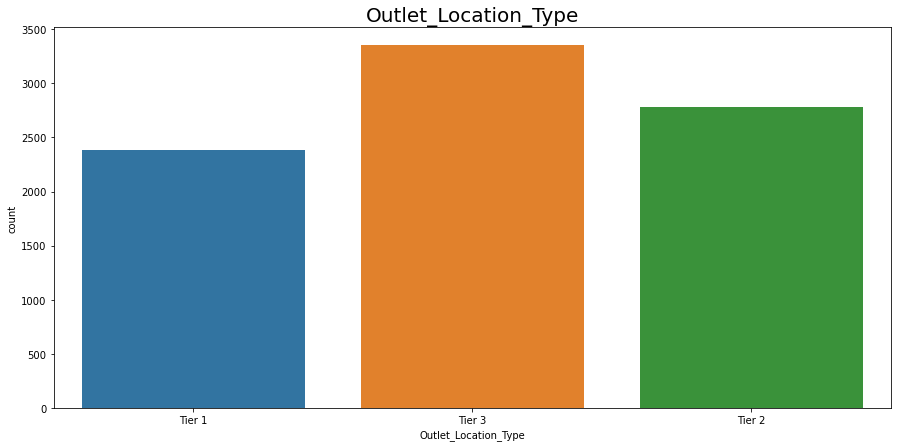

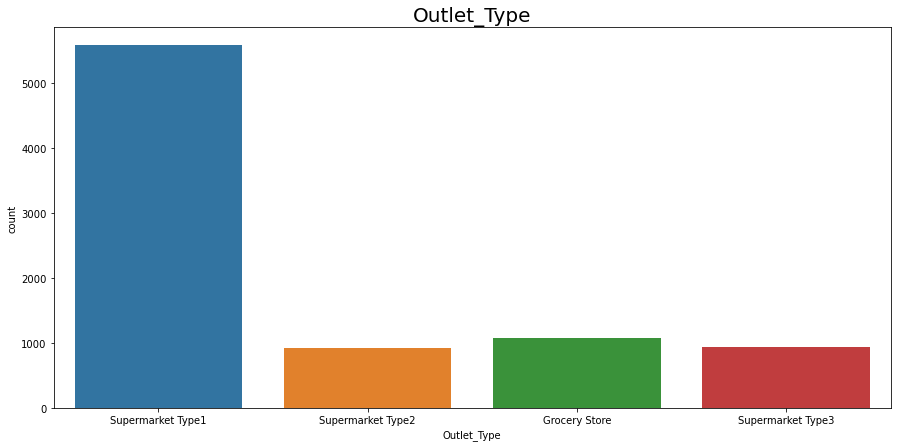

In [12]:
# Count plot of Categorical variable

for feature in Categorical:
    if feature != 'Item_Identifier':
        data = df.copy()
        plt.figure(figsize=(15,7))
        sns.countplot(x=data[feature])
        plt.title(feature, size=20)
        plt.show()

## Remark
1. In Item_Fat_Content the categories Low Fat, low fat, LF same
2. In Item_Fat_Content the categories Reegular and reg are same

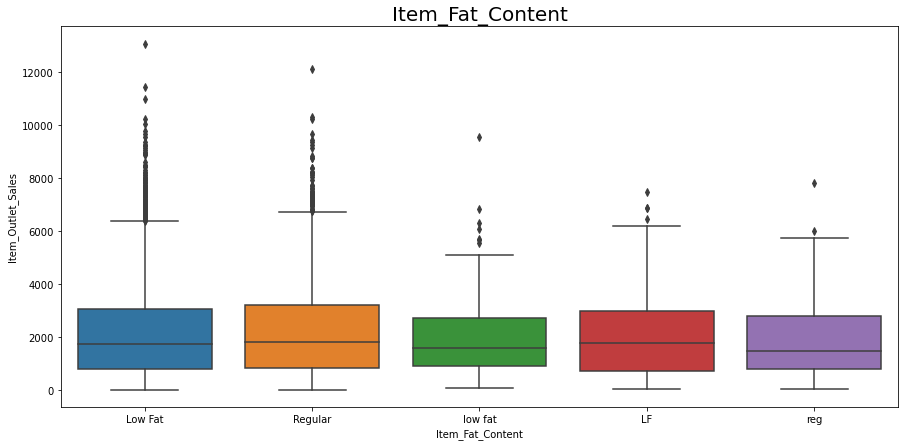

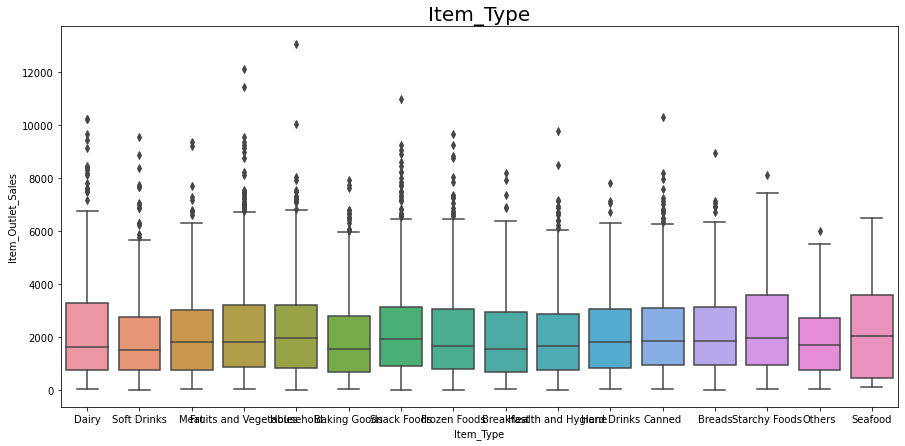

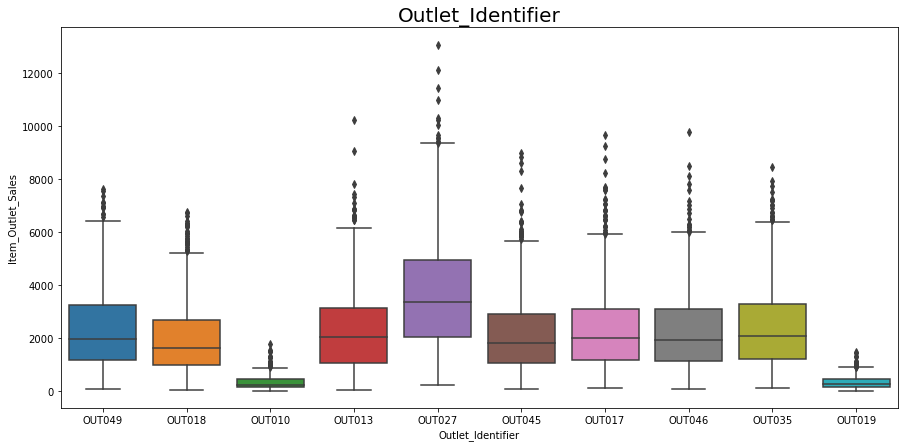

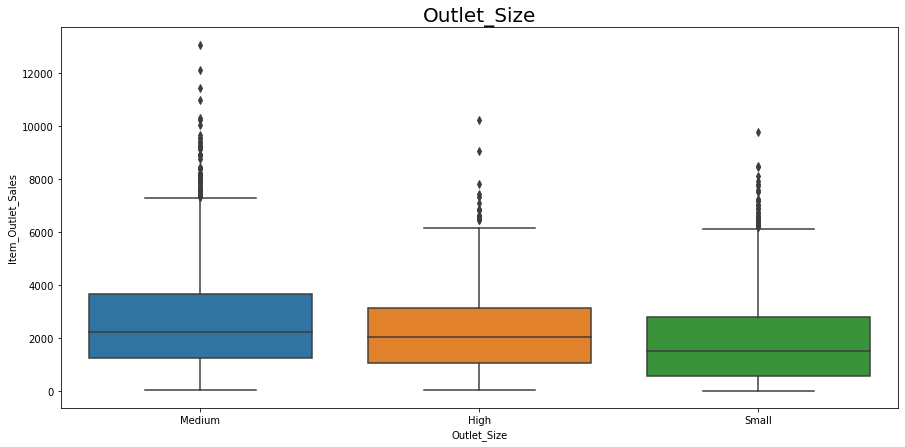

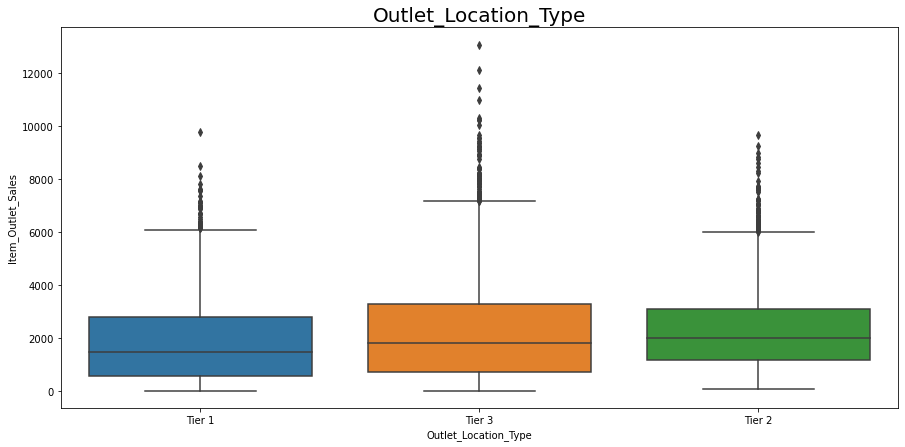

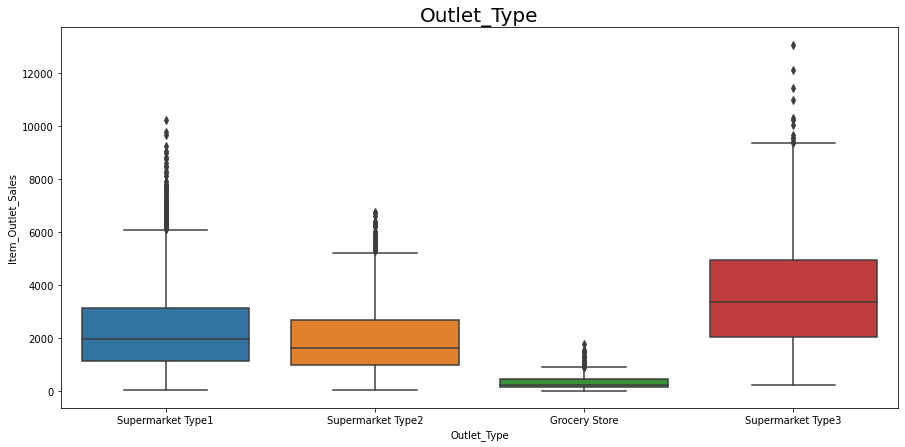

In [13]:
# Relationship Between Categorical Variable and Item_Outlet_Sales

for feature in Categorical:
    if feature != 'Item_Identifier':
        data = df.copy()
        plt.figure(figsize=(15,7))
        sns.boxplot(x=data[feature],y=data.Item_Outlet_Sales)
        plt.title(feature, size=20)
        plt.show()

## Summary of Nuerical data

In [14]:
#Summary of Nuerical data
from scipy.stats import skew, kurtosis

Numerical_summary = pd.DataFrame(columns=['columns','Min','1st_Quartile','Median','3rd_Quartile','Max','Mean','Variance',
                                          'Skewness','Kurtosis','MissingVals','%_MissingVals','IQR','lower','upper',
                                          'Outlier_upper','Outlier_lower'])
temp = pd.DataFrame()
for i in Numerical:
    temp['columns'] = [i]
    temp['Min'] = df[i].min()
    temp['1st_Quartile'] = df[i].quantile(0.25)
    temp['Median'] = df[i].quantile(0.5)
    temp['3rd_Quartile'] = df[i].quantile(0.75)
    temp['Max'] = df[i].max()
    temp['Mean'] = df[i].mean()
    temp['Variance'] = df[i].var()
    temp['Skewness'] = skew(df[i], axis=0, bias=True)
    temp['Kurtosis'] = kurtosis(df[i], axis=0, fisher=True, bias=True)
    temp['MissingVals'] = df[i].isnull().sum()
    temp['%_MissingVals'] = df[i].isnull().sum()/len(df)*100
    temp['IQR'] = df[i].quantile(0.75) - df[i].quantile(0.25)
    temp['lower'] = df[i].quantile(0.25) - 1.5*temp['IQR']
    temp['upper'] = df[i].quantile(0.75) + 1.5*temp['IQR']
    temp['Outlier_lower'] = len(df.loc[df[i]<float(temp['lower'])])
    temp['Outlier_upper'] = len(df.loc[df[i]>float(temp['upper'])])
    Numerical_summary = pd.concat([temp,Numerical_summary],ignore_index=True)
    
Numerical_summary

,columns,Min,1st_Quartile,Median,3rd_Quartile,Max,Mean,Variance,Skewness,Kurtosis,MissingVals,%_MissingVals,IQR,lower,upper,Outlier_lower,Outlier_upper
0,Item_Outlet_Sales,33.290,834.247400,1794.331000,3101.296400,13086.964800,2181.288914,2.912141e+06,1.177323,1.614225,0,0.000000,2267.049000,-2566.326100,6501.869900,0,186
1,Outlet_Establishment_Year,1985.000,1987.000000,1999.000000,2004.000000,2009.000000,1997.831867,7.008637e+01,-0.396571,-1.205691,0,0.000000,17.000000,1961.500000,2029.500000,0,0
2,Item_MRP,31.290,93.826500,143.012800,185.643700,266.888400,140.992782,3.878184e+03,0.127180,-0.889951,0,0.000000,91.817200,-43.899300,323.369500,0,0
3,Item_Visibility,0.000,0.026989,0.053931,0.094585,0.328391,0.066132,2.662335e-03,1.166885,1.677757,0,0.000000,0.067596,-0.074404,0.195979,0,144
4,Item_Weight,4.555,8.773750,12.600000,16.850000,21.350000,12.857645,2.156169e+01,NaN,NaN,1463,17.165317,8.076250,-3.340625,28.964375,0,0


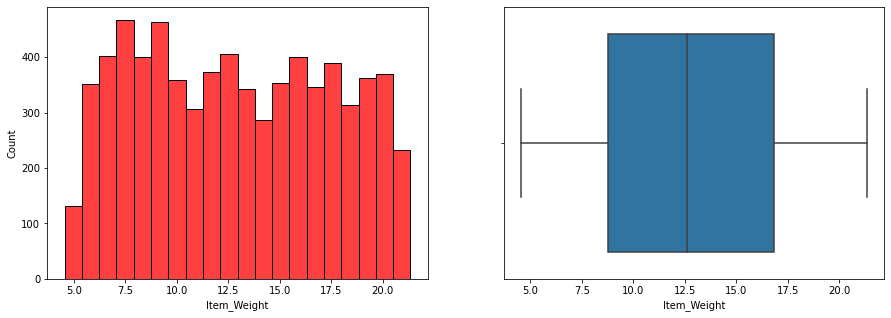

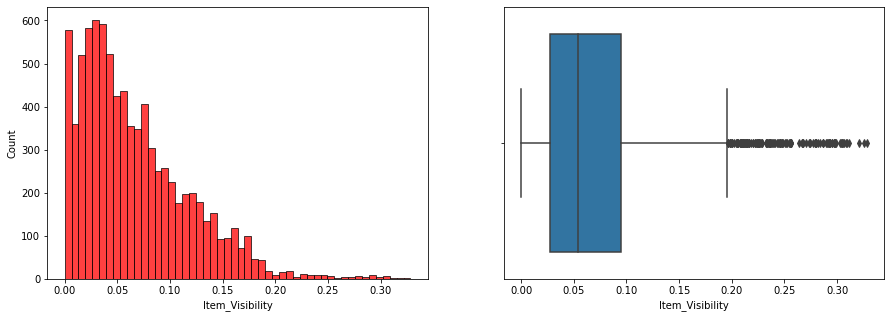

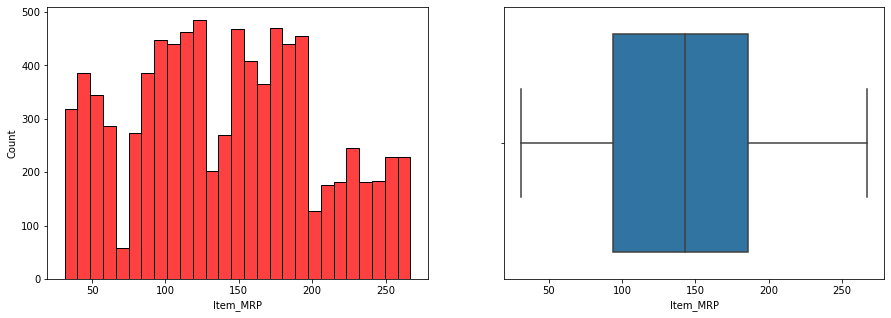

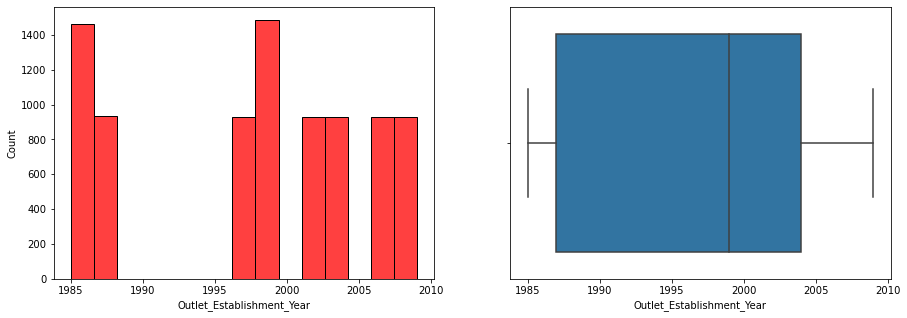

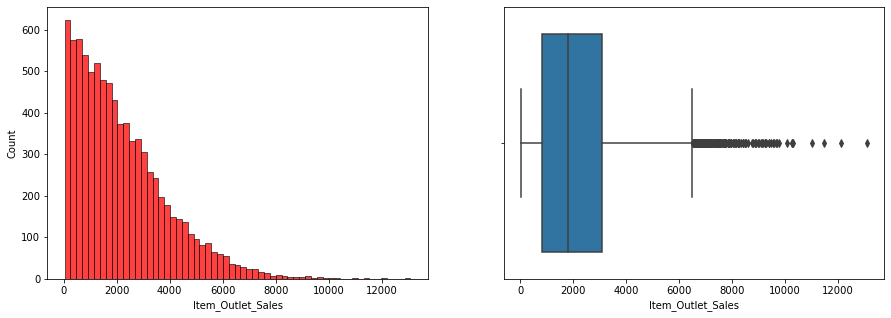

In [15]:
## plot Histogram and Boxplot to see the distribution and outliers

for feature in Numerical:
    fig = plt.figure(figsize = (15,5))
    ax1 = fig.add_subplot(1,2,1)
    sns.histplot(x=feature, data=df, color='red',ax = ax1)
    ax2 = fig.add_subplot(1,2,2)
    sns.boxplot(x=feature, data=df, ax = ax2)

## Remark
1. **Item_Visibility** and **Item_Outlet_Sales** have outliers and positivly skew.

In [16]:
## Correlation Matrix

df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


<AxesSubplot:>

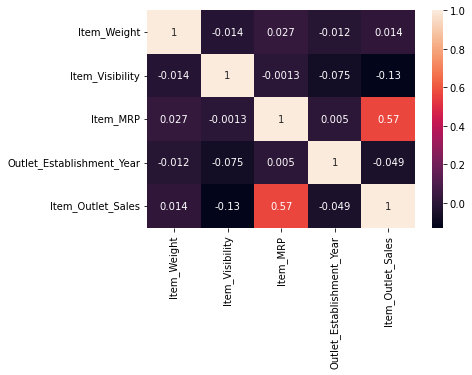

In [17]:
sns.heatmap(df.corr(), annot=True)

## Report
1. Correlation between **Item_Weight** and **Item_Outlet_Sales** is very **low**
2. Correlation between **Item_Visibility** and **Item_Outlet_Sales** is very **low**
3. Correlation between **Outlet_Establishment_Year** and **Item_Outlet_Sales** is very **low**

# Feature Engineering

In [18]:
df1 = df.copy()

## 1. Missing Value Imputation

Here wee have one categorical(Outlet_Size) and one numerical(Item_Weight) attribute with missing values.

In [19]:
round(df1['Item_Weight'].mean(),3)

12.858

In [20]:
## Creating a function which impute missing values of a numerical variable with it's median and with it's rando number

def Missing_Value_Imputation_with_Random(data,feature,median,mean):
    data[feature+"_median"] = data[feature].fillna(median)
    data[feature+"_mean"] = data[feature].fillna(mean)
    
    ##Create a random Series of variable feature
    Random_sample = data[feature].dropna().sample(data[feature].isnull().sum(),random_state = 0)   
    Random_sample.index = data[data[feature].isnull()].index
    data.loc[data[feature].isnull(),feature+'_random'] = Random_sample

In [21]:
Missing_Value_Imputation_with_Random(df1,'Item_Weight',df1['Item_Weight'].quantile(0.5),round(df1['Item_Weight'].mean(),3))

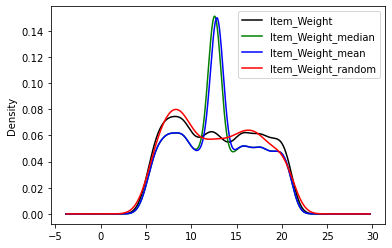

In [22]:
fig = plt.figure()
df1['Item_Weight'].plot(kind = 'kde',color = 'black')
df1.Item_Weight_median.plot(kind = 'kde',color = 'green')
df1.Item_Weight_mean.plot(kind = 'kde',color = 'blue')
df1.Item_Weight_random.plot(kind = 'kde',color = 'red')
plt.legend()

* Here we use random samples to fill the missing values as it does not change the distribution of the variale.

In [23]:
df1['Item_Weight'] = df1['Item_Weight_median']

df1.drop(['Item_Weight_random','Item_Weight_median','Item_Weight_mean'],axis = 1,inplace=True)
df1.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

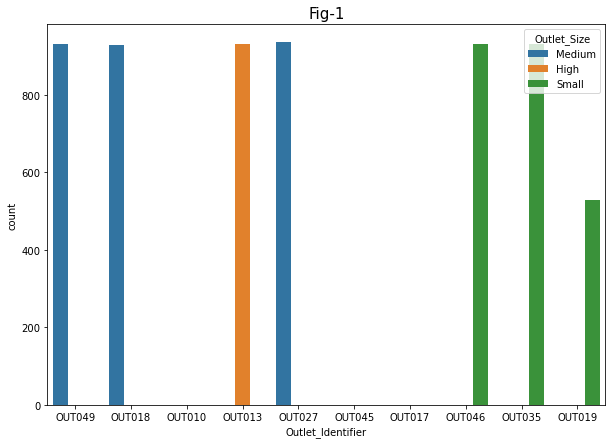

In [24]:
# Outlet_Identifier vs Outlet_Size
plt.figure(figsize=(10,7))
sns.countplot(x = 'Outlet_Identifier',data = df1,hue = 'Outlet_Size')
plt.title('Fig-1',size = 15)
plt.show()

* Summary of Fig-1
  
  Here we can see that Outlet_Identifier **OUT010, OUT017, OUT045** had no Outlet_Size

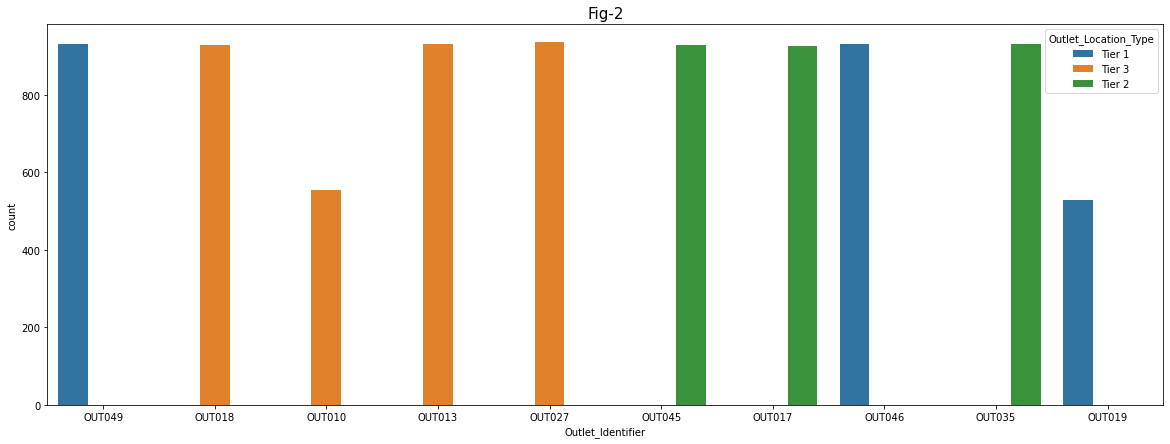

In [25]:
# Outlet_Identifier VS Outlet_Location_Type
plt.figure(figsize=(20,7))
sns.countplot(x = 'Outlet_Identifier',data = df1,hue = 'Outlet_Location_Type')
plt.title('Fig-2',size = 15)
plt.show()

* Summary of Fig-2
    Here wee can see that 
    
1. OUT010 belongs to Tier 3
2. OUT017, OUT045 belongs to Tier 2

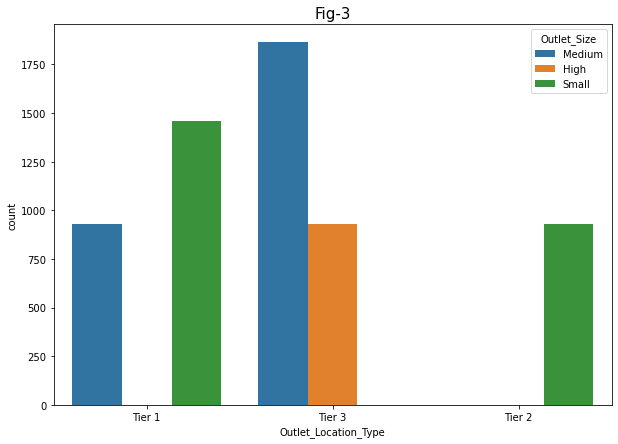

In [26]:
# Outlet_Location_Type Vs Outlet_Size
plt.figure(figsize=(10,7))
sns.countplot(x = 'Outlet_Location_Type',data = df1,hue = 'Outlet_Size')
plt.title('Fig-3',size = 15)
plt.show()

* Summary of Fig-3


From this figure we can say 
1. Tier-2 has Outlet_Size Small

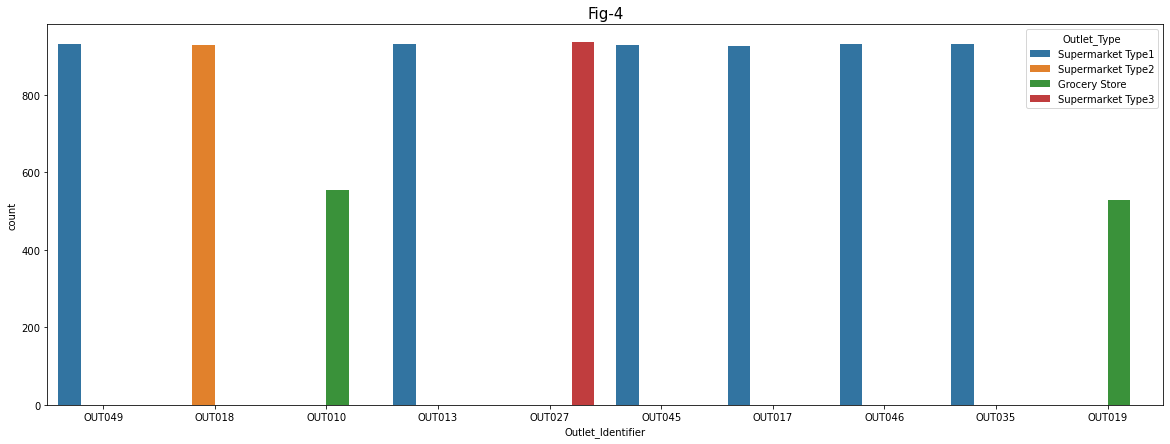

In [27]:
# Outlet_Identifier Vs Outlet_Type
plt.figure(figsize=(20,7))
sns.countplot(x = 'Outlet_Identifier',data = df1,hue = 'Outlet_Type')
plt.title('Fig-4',size = 15)
plt.show()

* Summary of Fig-4

    From this Figure we can say Outlet_Identifier OUT010 is a Grocery Store

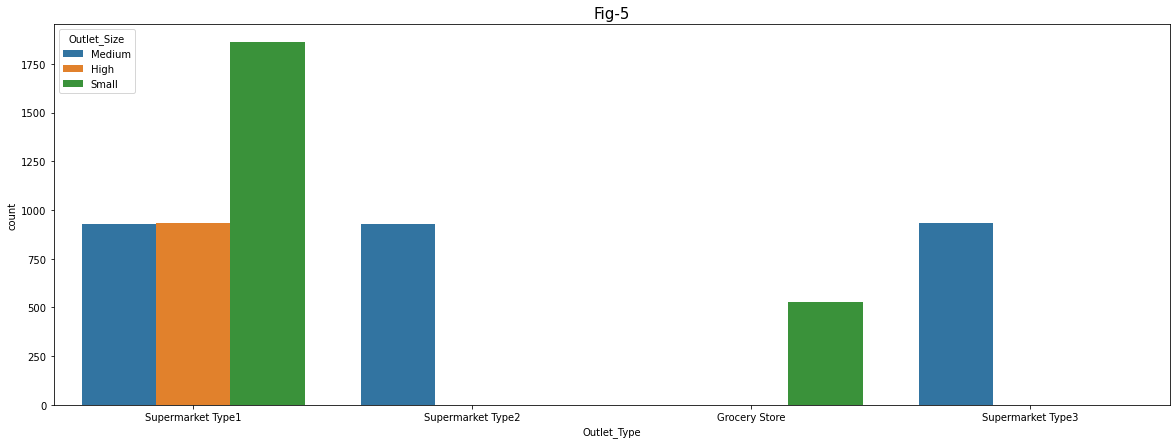

In [28]:
# Outlet_Type Vs Outlet_Size
plt.figure(figsize=(20,7))
sns.countplot(x = 'Outlet_Type',data = df1,hue = 'Outlet_Size')
plt.title('Fig-5',size = 15)
plt.show()

* Summary of Fig-5

    From this we can say Grocery Store are small

In [29]:
# So we can replace the missing values of Outlet_Size with the category small

df1['Outlet_Size'].fillna('Small',inplace=True)

In [30]:
df1.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

## 2. Outlier Remover

Item_Visibility has outliers so we remove them

In [31]:
# Calculating IQR, Upper lavel and Lower level of the distributuion of Item Visibility

IQR = df1['Item_Visibility'].quantile(.75) - df1['Item_Visibility'].quantile(.25)
u_lvl = df1['Item_Visibility'].quantile(.75) + 1.5*IQR
l_lvl = df1['Item_Visibility'].quantile(.25) - 1.5*IQR

# removing outliers
df1.loc[df1['Item_Visibility'] > u_lvl, ['Item_Visibility']] = u_lvl

<AxesSubplot:xlabel='Item_Visibility'>

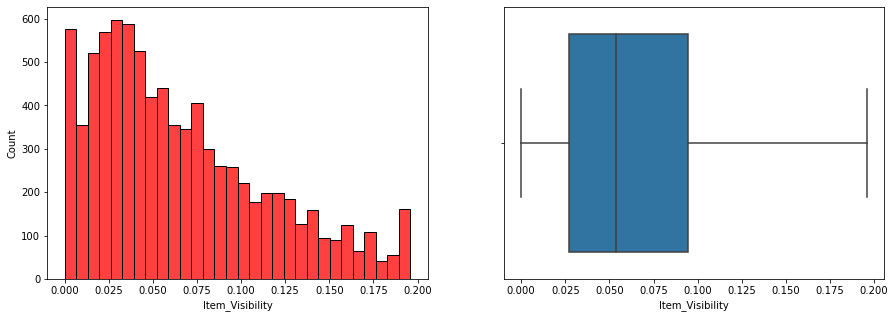

In [32]:
fig = plt.figure(figsize = (15,5))
ax1 = fig.add_subplot(1,2,1)
sns.histplot(x='Item_Visibility', data=df1, color='red',ax = ax1)
ax2 = fig.add_subplot(1,2,2)
sns.boxplot(x='Item_Visibility', data=df1, ax = ax2)

Now Item_Visibility have a lot of value 0 which make no sence so we can treate them as a missing value 

In [33]:
df1['Item_Visibility'].replace(0,np.nan,inplace=True)
df1.isnull().sum()

Item_Identifier                0
Item_Weight                    0
Item_Fat_Content               0
Item_Visibility              526
Item_Type                      0
Item_MRP                       0
Outlet_Identifier              0
Outlet_Establishment_Year      0
Outlet_Size                    0
Outlet_Location_Type           0
Outlet_Type                    0
Item_Outlet_Sales              0
dtype: int64

In [34]:
Missing_Value_Imputation_with_Random(df1,'Item_Visibility',df1['Item_Visibility'].quantile(0.5),df1['Item_Visibility'].mean())

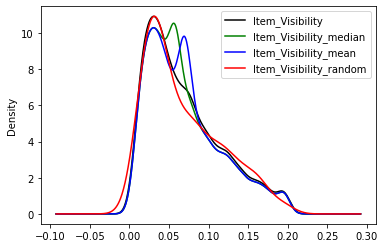

In [35]:
fig = plt.figure()
df1['Item_Visibility'].plot(kind = 'kde',color = 'black')
df1.Item_Visibility_median.plot(kind = 'kde',color = 'green')
df1.Item_Visibility_mean.plot(kind = 'kde',color = 'blue')
df1.Item_Visibility_random.plot(kind = 'kde',color = 'red')
plt.legend()

In [36]:
df1['Item_Visibility'] = df1['Item_Visibility_median']

In [37]:
df1.drop(['Item_Visibility_random','Item_Visibility_median','Item_Visibility_mean'],axis = 1,inplace=True)

df1.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

<AxesSubplot:xlabel='Item_Visibility'>

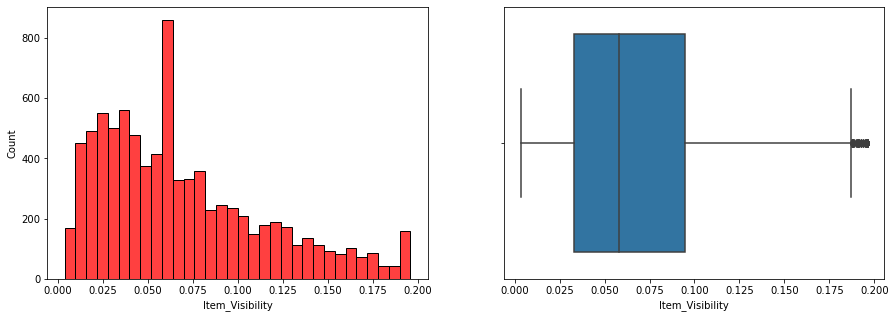

In [38]:
fig = plt.figure(figsize = (15,5))
ax1 = fig.add_subplot(1,2,1)
sns.histplot(x='Item_Visibility', data=df1, color='red',ax = ax1)
ax2 = fig.add_subplot(1,2,2)
sns.boxplot(x='Item_Visibility', data=df1, ax = ax2)

In [39]:
# Calculating IQR, Upper lavel and Lower level of the distributuion of Item Visibility

IQR = df1['Item_Visibility'].quantile(.75) - df1['Item_Visibility'].quantile(.25)
u_lvl = df1['Item_Visibility'].quantile(.75) + 1.5*IQR
l_lvl = df1['Item_Visibility'].quantile(.25) - 1.5*IQR

# removing outliers
df1.loc[df1['Item_Visibility'] > u_lvl, ['Item_Visibility']] = u_lvl

In [40]:
df2 = df1.copy()

## 3. Transformation of attriutes (Convert them to normal distriution)

Item_Weight, Item_Visibility, Item_MRP, Outlet_Establishment_Year

In [41]:
## Checking Gaussian Distribution

import scipy.stats as stats

def QQ_plot(series):
    
    plt.figure(figsize = (15,6))
    
    plt.subplot(121)
    sns.histplot(series, kde = True)
    
    plt.subplot(122)
    stats.probplot(series, plot = plt)
    
    plt.show()

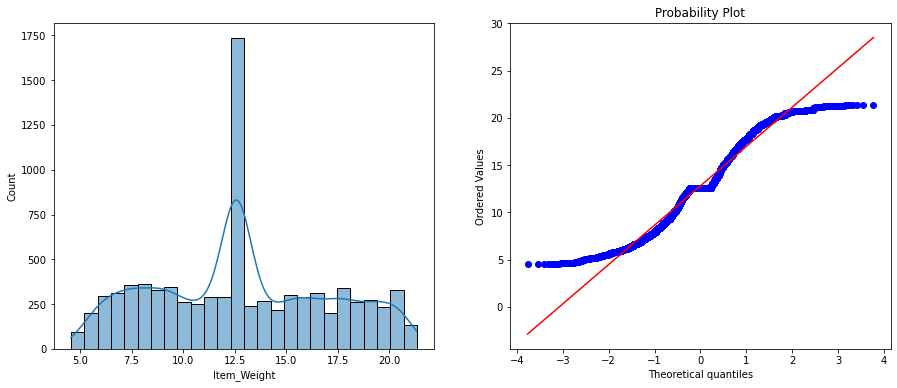

In [42]:
QQ_plot(df2['Item_Weight'])

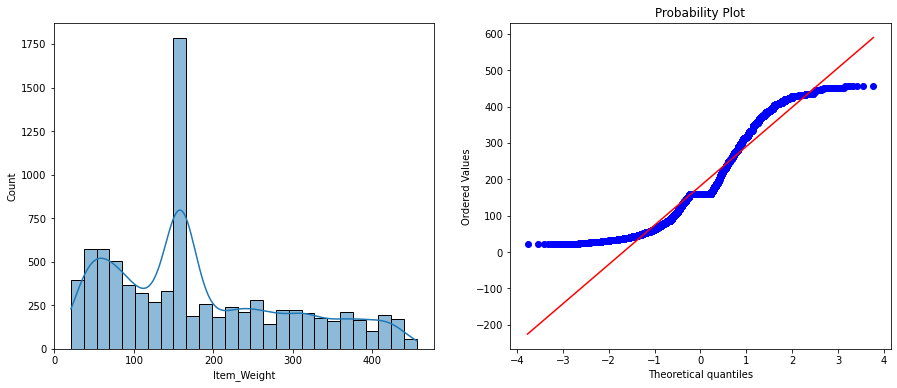

In [43]:
QQ_plot(df2['Item_Weight']**2)

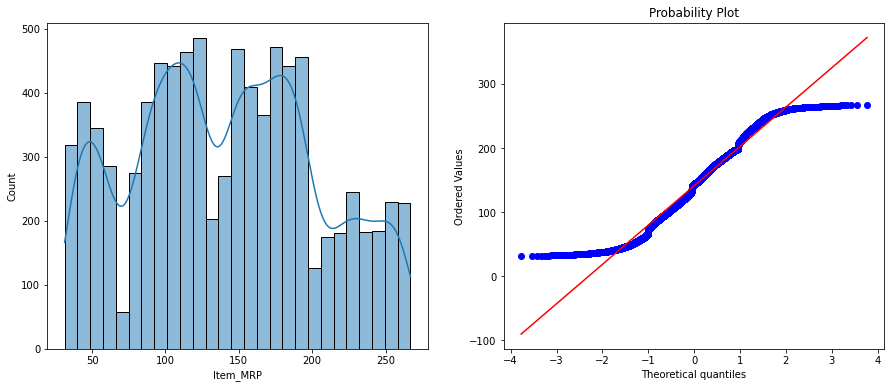

In [44]:
QQ_plot(df2['Item_MRP'])

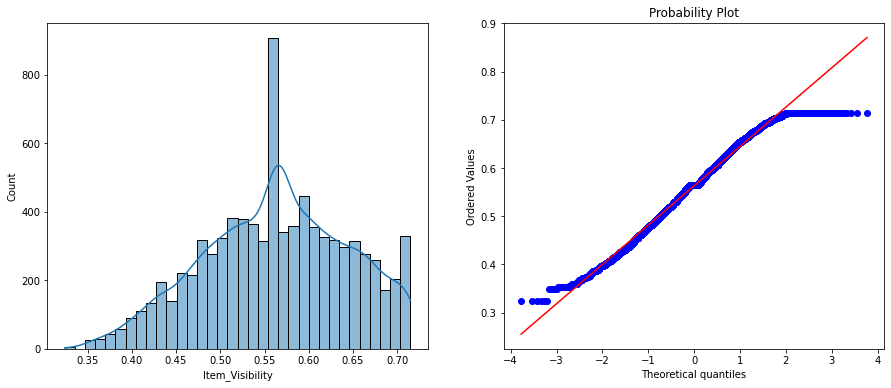

In [45]:
QQ_plot(df2['Item_Visibility']**(1/5))

In [46]:
## Creating a new variale Outlet_Establishment_Age

import datetime
y = datetime.datetime.now()

df2['Outlet_Age'] = df2['Outlet_Establishment_Year'].apply(lambda x: y.year - x)

<AxesSubplot:xlabel='Outlet_Age'>

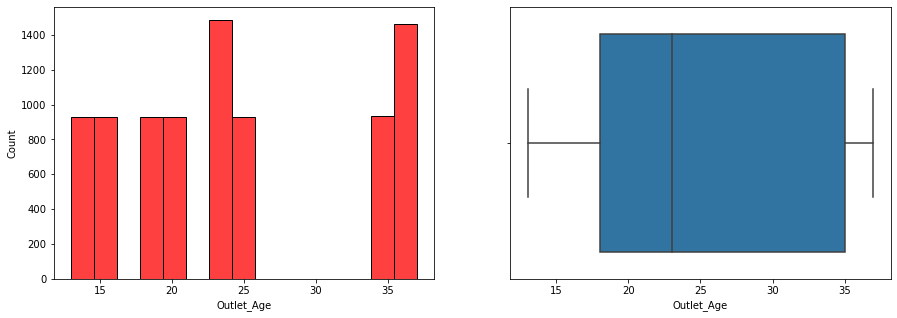

In [47]:
fig = plt.figure(figsize = (15,5))
ax1 = fig.add_subplot(1,2,1)
sns.histplot(x='Outlet_Age', data=df2, color='red',ax = ax1)
ax2 = fig.add_subplot(1,2,2)
sns.boxplot(x='Outlet_Age', data=df2, ax = ax2)

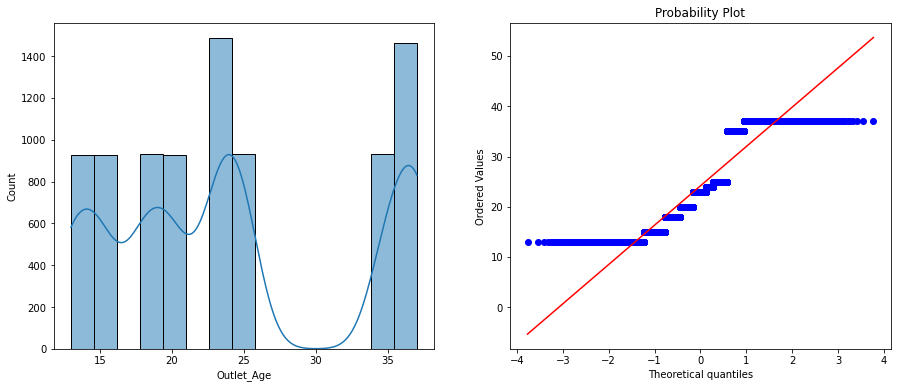

In [48]:
QQ_plot(df2['Outlet_Age'])

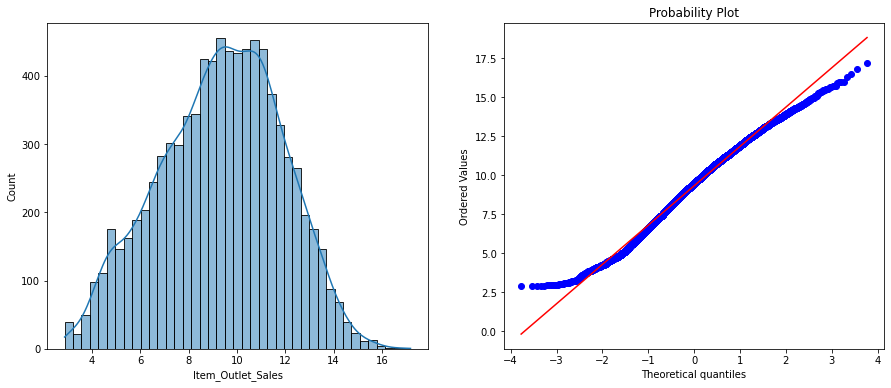

In [49]:
QQ_plot(df2['Item_Outlet_Sales']**(0.3))

In [50]:
## Reciprocal Transformation of Item_Visibility

df2['Item_Visibility'] = df2['Item_Visibility']**(1/5)

In [51]:
## We transform the Item_Outlet_Sales as it follows a positively skewed distribution. By this transformation we convart
# the target column into a normal distribution

df2['Item_Outlet_Sales'] = df2['Item_Outlet_Sales']**(0.3)

## 4. Checking multicollinearity using VIF

In [52]:
df3 = df2.copy()

In [53]:
## Calculating VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df3[['Item_Weight','Item_Visibility','Item_MRP','Outlet_Age']]

vif_data = pd.DataFrame()
vif_data["Features"] = X.columns

vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

vif_data

,Features,VIF
0,Item_Weight,8.768451
1,Item_Visibility,16.326685
2,Item_MRP,5.701518
3,Outlet_Age,8.473177


In [54]:
df3.drop(columns=['Item_Visibility'],axis = 1,inplace = True)

In [55]:
## Calculating VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df3[['Item_Weight','Item_MRP','Outlet_Age']]

vif_data = pd.DataFrame()
vif_data["Features"] = X.columns

vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

vif_data

,Features,VIF
0,Item_Weight,6.298966
1,Item_MRP,4.864825
2,Outlet_Age,5.947901


In [56]:
df3.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,FDA15,9.30,Low Fat,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,11.794838,23
1,DRC01,5.92,Regular,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,6.223654,13
2,FDN15,17.50,Low Fat,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,9.919649,23
3,FDX07,19.20,Regular,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,7.234707,24
4,NCD19,8.93,Low Fat,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,7.930641,35


## Convert the string values into lowercase 

In [57]:
df3=df3.apply(lambda x: x.astype(str).str.lower())
df3.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,fda15,9.3,low fat,dairy,249.8092,out049,1999,medium,tier 1,supermarket type1,11.794838416011734,23
1,drc01,5.92,regular,soft drinks,48.2692,out018,2009,medium,tier 3,supermarket type2,6.223653507948934,13
2,fdn15,17.5,low fat,meat,141.618,out049,1999,medium,tier 1,supermarket type1,9.919648958211196,23
3,fdx07,19.2,regular,fruits and vegetables,182.095,out010,1998,small,tier 3,grocery store,7.234706926215967,24
4,ncd19,8.93,low fat,household,53.8614,out013,1987,high,tier 3,supermarket type1,7.930641467059172,35


## 5. Categorical Variables Encoding

In [58]:
df4 = df3.copy()

In [59]:
df4['Item_Fat_Content'].unique()

array(['low fat', 'regular', 'lf', 'reg'], dtype=object)

In [60]:
# Change the values of Item_Fat_Content

item_fat = df4.Item_Fat_Content.replace('lf', 'low fat')
item_fat = item_fat.replace('reg', 'regular')

df4['Item_Fat_Content'] = item_fat

In [61]:
## Drop Item_Identifier, Outlet_Establishment_Year

df4.drop(columns=['Outlet_Establishment_Year','Item_Identifier','Outlet_Identifier'],axis = 1,inplace=True)
df4.head()

,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,9.3,low fat,dairy,249.8092,medium,tier 1,supermarket type1,11.794838416011734,23
1,5.92,regular,soft drinks,48.2692,medium,tier 3,supermarket type2,6.223653507948934,13
2,17.5,low fat,meat,141.618,medium,tier 1,supermarket type1,9.919648958211196,23
3,19.2,regular,fruits and vegetables,182.095,small,tier 3,grocery store,7.234706926215967,24
4,8.93,low fat,household,53.8614,high,tier 3,supermarket type1,7.930641467059172,35


In [62]:
print(df4['Outlet_Size'].unique())
print(df4['Outlet_Location_Type'].unique())

['medium' 'small' 'high']
['tier 1' 'tier 3' 'tier 2']


In [63]:
# Find out the frequency of Outlet_Identifier

Outlet_Size_map = {'small':0, 'medium':1, 'high':2}
Outlet_Location_Type_map = {'tier 1':2, 'tier 2':1, 'tier 3':0}

In [64]:
# Replace the elements by feature map

df4['Outlet_Size'] = df4['Outlet_Size'].map(Outlet_Size_map)
df4['Outlet_Location_Type'] = df4['Outlet_Location_Type'].map(Outlet_Location_Type_map)

In [65]:
df4.head()

,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,9.3,low fat,dairy,249.8092,1,2,supermarket type1,11.794838416011734,23
1,5.92,regular,soft drinks,48.2692,1,0,supermarket type2,6.223653507948934,13
2,17.5,low fat,meat,141.618,1,2,supermarket type1,9.919648958211196,23
3,19.2,regular,fruits and vegetables,182.095,0,0,grocery store,7.234706926215967,24
4,8.93,low fat,household,53.8614,2,0,supermarket type1,7.930641467059172,35


In [66]:
## One Hot Encoding

from sklearn.preprocessing import OneHotEncoder
OneHot = OneHotEncoder(drop='first', sparse=False)

onehot_vector = OneHot.fit_transform(df4[['Item_Fat_Content','Item_Type','Outlet_Type']])
onehot_vector

array([[0., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [67]:
# creating one hot encoded data columns

cols = pd.get_dummies(df4[['Item_Fat_Content','Item_Type','Outlet_Type']], drop_first=True).columns.to_list()
cols

['Item_Fat_Content_regular',
 'Item_Type_breads',
 'Item_Type_breakfast',
 'Item_Type_canned',
 'Item_Type_dairy',
 'Item_Type_frozen foods',
 'Item_Type_fruits and vegetables',
 'Item_Type_hard drinks',
 'Item_Type_health and hygiene',
 'Item_Type_household',
 'Item_Type_meat',
 'Item_Type_others',
 'Item_Type_seafood',
 'Item_Type_snack foods',
 'Item_Type_soft drinks',
 'Item_Type_starchy foods',
 'Outlet_Type_supermarket type1',
 'Outlet_Type_supermarket type2',
 'Outlet_Type_supermarket type3']

In [68]:
onehot_dataframe = pd.DataFrame(onehot_vector, columns=cols)
onehot_dataframe.head()

,Item_Fat_Content_regular,Item_Type_breads,Item_Type_breakfast,Item_Type_canned,Item_Type_dairy,Item_Type_frozen foods,Item_Type_fruits and vegetables,Item_Type_hard drinks,Item_Type_health and hygiene,Item_Type_household,Item_Type_meat,Item_Type_others,Item_Type_seafood,Item_Type_snack foods,Item_Type_soft drinks,Item_Type_starchy foods,Outlet_Type_supermarket type1,Outlet_Type_supermarket type2,Outlet_Type_supermarket type3
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [69]:
pd.get_dummies(df4[['Item_Fat_Content','Item_Type','Outlet_Type']], drop_first=True).head()

,Item_Fat_Content_regular,Item_Type_breads,Item_Type_breakfast,Item_Type_canned,Item_Type_dairy,Item_Type_frozen foods,Item_Type_fruits and vegetables,Item_Type_hard drinks,Item_Type_health and hygiene,Item_Type_household,Item_Type_meat,Item_Type_others,Item_Type_seafood,Item_Type_snack foods,Item_Type_soft drinks,Item_Type_starchy foods,Outlet_Type_supermarket type1,Outlet_Type_supermarket type2,Outlet_Type_supermarket type3
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0


In [70]:
df4 = pd.concat([df4, onehot_dataframe], axis=1)
df4.head()

,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age,Item_Fat_Content_regular,Item_Type_breads,Item_Type_breakfast,Item_Type_canned,Item_Type_dairy,Item_Type_frozen foods,Item_Type_fruits and vegetables,Item_Type_hard drinks,Item_Type_health and hygiene,Item_Type_household,Item_Type_meat,Item_Type_others,Item_Type_seafood,Item_Type_snack foods,Item_Type_soft drinks,Item_Type_starchy foods,Outlet_Type_supermarket type1,Outlet_Type_supermarket type2,Outlet_Type_supermarket type3
0,9.3,low fat,dairy,249.8092,1,2,supermarket type1,11.794838416011734,23,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,5.92,regular,soft drinks,48.2692,1,0,supermarket type2,6.223653507948934,13,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,17.5,low fat,meat,141.618,1,2,supermarket type1,9.919648958211196,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,19.2,regular,fruits and vegetables,182.095,0,0,grocery store,7.234706926215967,24,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,8.93,low fat,household,53.8614,2,0,supermarket type1,7.930641467059172,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [71]:
df4.drop(['Item_Fat_Content','Item_Type','Outlet_Type'], axis=1, inplace=True)
df4.head()

,Item_Weight,Item_MRP,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Outlet_Age,Item_Fat_Content_regular,Item_Type_breads,Item_Type_breakfast,Item_Type_canned,Item_Type_dairy,Item_Type_frozen foods,Item_Type_fruits and vegetables,Item_Type_hard drinks,Item_Type_health and hygiene,Item_Type_household,Item_Type_meat,Item_Type_others,Item_Type_seafood,Item_Type_snack foods,Item_Type_soft drinks,Item_Type_starchy foods,Outlet_Type_supermarket type1,Outlet_Type_supermarket type2,Outlet_Type_supermarket type3
0,9.3,249.8092,1,2,11.794838416011734,23,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,5.92,48.2692,1,0,6.223653507948934,13,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,17.5,141.618,1,2,9.919648958211196,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,19.2,182.095,0,0,7.234706926215967,24,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,8.93,53.8614,2,0,7.930641467059172,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## Save required models in pickle files

In [73]:
# import pickle
# file = open('models/onehot_encoder.pickle','wb')

# pickle.dump(OneHot, file)
# file.close()

In [74]:
# #Store the Preprocessed data in a .csv format

# df4.to_csv('original_data_set/preprocessed_data.csv', index = False)
# file.close()